In [104]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
import json
# Import the API key.
from config import weather_api_key

from pprint import pprint

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [105]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [87]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [88]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88b157cdf30e6d69fb32ee4af932a7d


In [89]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88b157cdf30e6d69fb32ee4af932a7d&q=Boston


In [90]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [91]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [98]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [99]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":67.59,"feels_like":67.48,"temp_min":63.14,"temp_max":70.25,"pressure":1017,"humidity":73},"visibility":10000,"wind":{"speed":4.61,"deg":70},"clouds":{"all":75},"dt":1660616068,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1660557089,"sunset":1660607172},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [106]:
# Get the JSON text of the 'Get' request.
c = city_weather.json()

pprint(c)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.3584, 'lon': -71.0598},
 'dt': 1660616068,
 'id': 4930956,
 'main': {'feels_like': 67.48,
          'humidity': 73,
          'pressure': 1017,
          'temp': 67.59,
          'temp_max': 70.25,
          'temp_min': 63.14},
 'name': 'Boston',
 'sys': {'country': 'US',
         'id': 2013408,
         'sunrise': 1660557089,
         'sunset': 1660607172,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 4.61}}


In [107]:
print(json.dumps(city_weather.json(), indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.3584,
        "lon": -71.0598
    },
    "dt": 1660616068,
    "id": 4930956,
    "main": {
        "feels_like": 67.48,
        "humidity": 73,
        "pressure": 1017,
        "temp": 67.59,
        "temp_max": 70.25,
        "temp_min": 63.14
    },
    "name": "Boston",
    "sys": {
        "country": "US",
        "id": 2013408,
        "sunrise": 1660557089,
        "sunset": 1660607172,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 4.61
    }
}


In [58]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "B0ston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [59]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 71.33,
  'feels_like': 71.02,
  'temp_min': 67.95,
  'temp_max': 73.85,
  'pressure': 1017,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 15.99, 'deg': 300, 'gust': 0},
 'clouds': {'all': 75},
 'dt': 1660608211,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1660557089,
  'sunset': 1660607172},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [60]:
# Get the JSON data.
boston_data = city_weather.json()
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 73.85 61 75 15.99


In [63]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 8, 16, 0, 3, 31)

In [64]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [65]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1660557089,
 'sunset': 1660607172}

In [108]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1
# # Run an API request for each of the cities.
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# # If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [109]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,58.21,79,100,19.08,AU,2022-08-16 00:06:40
1,Nelson Bay,-32.7167,152.1500,60.01,68,49,10.00,AU,2022-08-16 00:06:41
2,Cidreira,-30.1811,-50.2056,60.93,97,79,7.20,BR,2022-08-16 00:06:41
3,Camacha,33.0833,-16.3333,71.02,88,40,11.50,PT,2022-08-16 00:06:42
4,Victoria,22.2855,114.1577,86.38,86,44,5.01,HK,2022-08-16 00:04:55
5,Pisco,-13.7000,-76.2167,62.02,82,3,20.71,PE,2022-08-16 00:05:00
6,San Jose,37.3394,-121.8950,101.70,32,0,12.66,US,2022-08-16 00:06:43
7,Vostok,46.4856,135.8833,67.64,67,28,4.61,RU,2022-08-16 00:06:43
8,Guilin,25.2819,110.2864,80.67,86,92,2.06,CN,2022-08-16 00:06:43
9,Alice Springs,-23.7000,133.8833,56.75,41,12,8.05,AU,2022-08-16 00:06:44


In [110]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [111]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [114]:
# Get today's date in seconds.
today = time.time()
today

1660617525.6399088

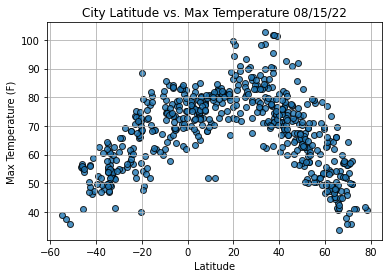

In [115]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()